In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df_test=pd.read_csv(r"H:\jpytr_pro\data science\projects\house-prices-advanced-regression-techniques\test.csv")
df_train=pd.read_csv(r"H:\jpytr_pro\data science\projects\house-prices-advanced-regression-techniques\train.csv")

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [5]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
print(df_train.shape)
print("*"*50)
print(df_train.shape)

(1460, 81)
**************************************************
(1460, 81)


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [10]:
df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000   
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000   
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

In [11]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [12]:
df_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [13]:
df_test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### The target variable : Distribution of SalePrice

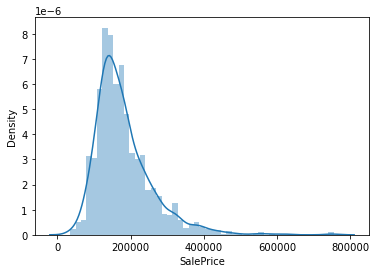

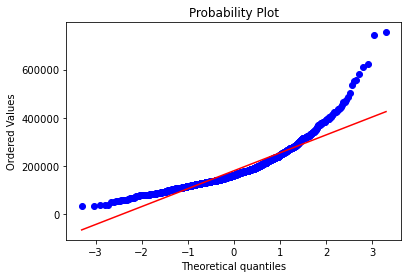

Skewness: 1.882876
Kurtosis: 6.536282


In [14]:
sns.distplot(df_train['SalePrice']);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show() 
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

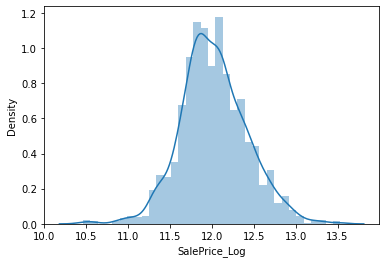

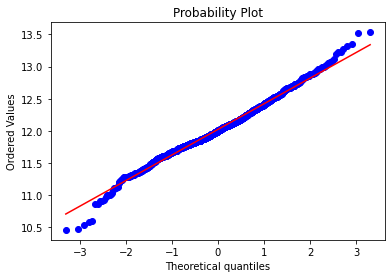

Skewness: 0.121335
Kurtosis: 0.809532


In [15]:
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])

sns.distplot(df_train['SalePrice_Log']);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice_Log'], plot=plt)
plt.show()
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())
# dropping old column
df_train.drop('SalePrice', axis= 1, inplace=True)

<AxesSubplot:>

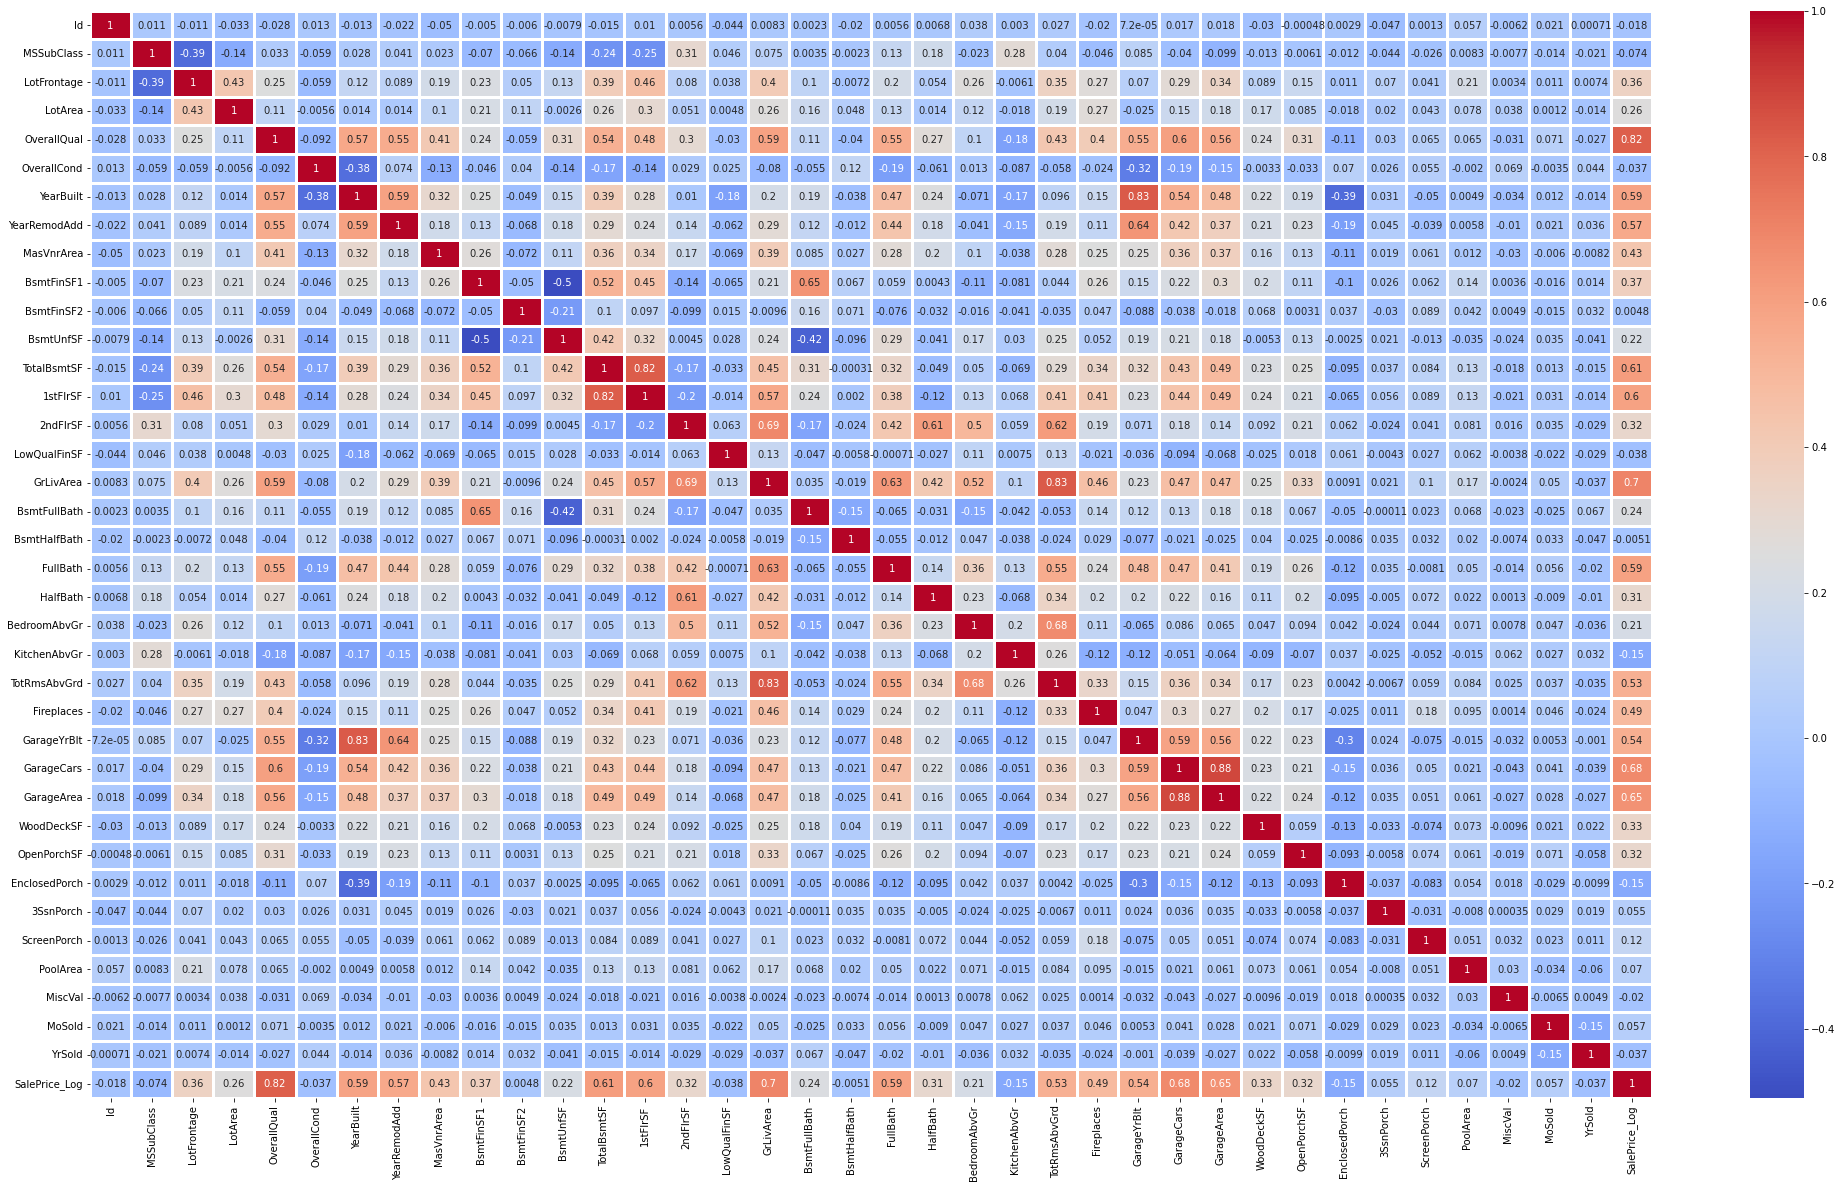

In [16]:
# Correlation 

fig, ax = plt.subplots(figsize=(35, 20))
corr=df_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=3)

In [17]:
corr = df_train.corr()

In [18]:
corr[corr['SalePrice_Log']>0.8].index

Index(['OverallQual', 'SalePrice_Log'], dtype='object')

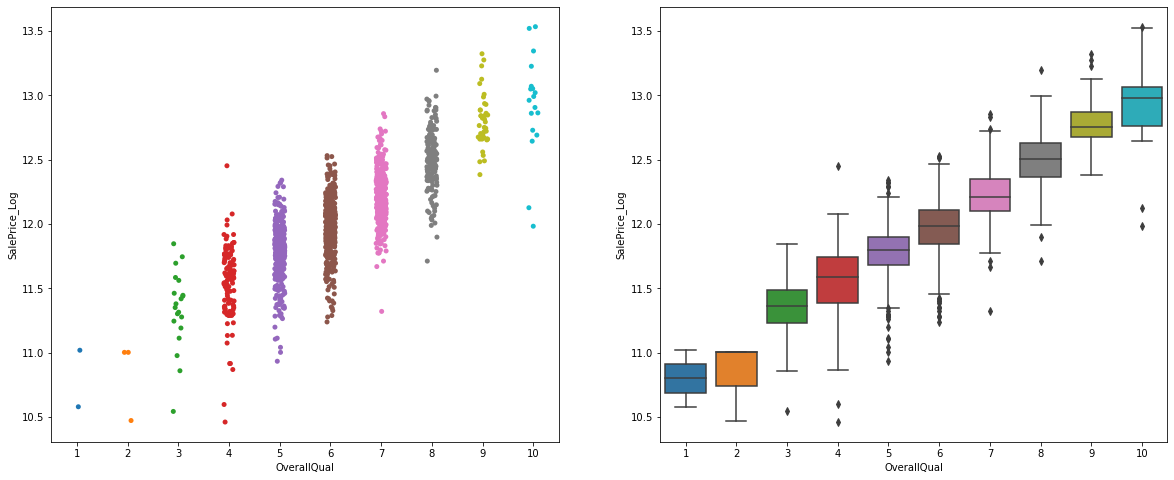

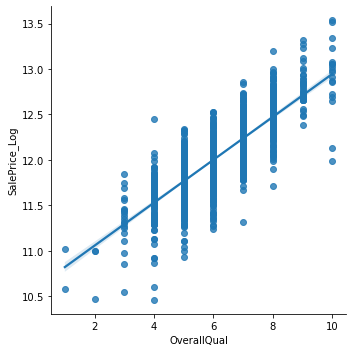

In [19]:
# OverallQuall - SalePrice [Pearson = 0.8]

figure, ax = plt.subplots(1,2, figsize = (20,8))
sns.stripplot(data=df_train, x = 'OverallQual', y='SalePrice_Log', ax = ax[0])
sns.lmplot(data=df_train, x = 'OverallQual', y='SalePrice_Log')
sns.boxplot(data=df_train, x = 'OverallQual', y='SalePrice_Log', ax = ax[1])
plt.show()

In [20]:
corr[corr['SalePrice_Log']>0.5].index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice_Log'],
      dtype='object')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice_Log'>

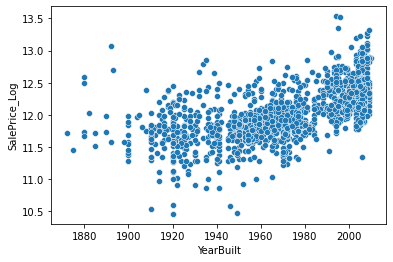

In [21]:
sns.scatterplot(x='YearBuilt',y='SalePrice_Log',data=df_train) 

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice_Log'>

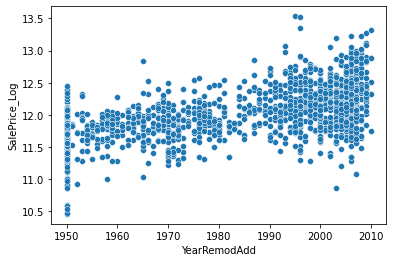

In [22]:
sns.scatterplot(x='YearRemodAdd',y='SalePrice_Log',data=df_train) 

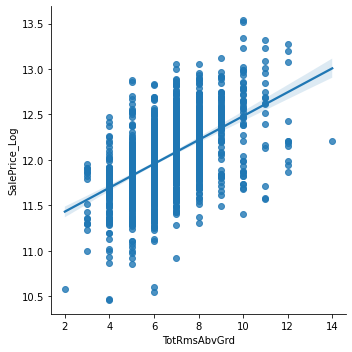

In [23]:
sns.lmplot(x='TotRmsAbvGrd',y='SalePrice_Log',data=df_train) 

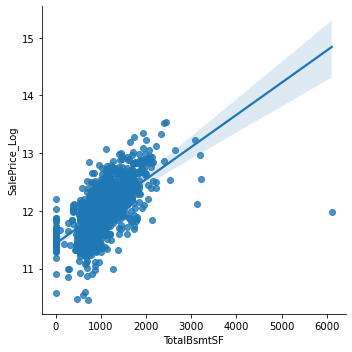

In [24]:
sns.lmplot(x='TotalBsmtSF',y='SalePrice_Log',data=df_train) 

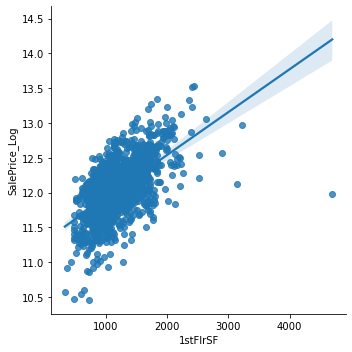

In [25]:
sns.lmplot(x='1stFlrSF',y='SalePrice_Log',data=df_train) 

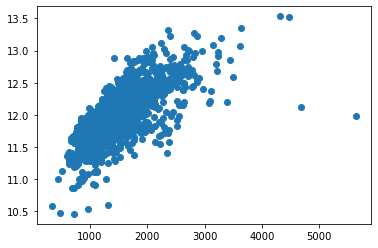

In [26]:
plt.scatter(x= 'GrLivArea', y='SalePrice_Log', data = df_train)

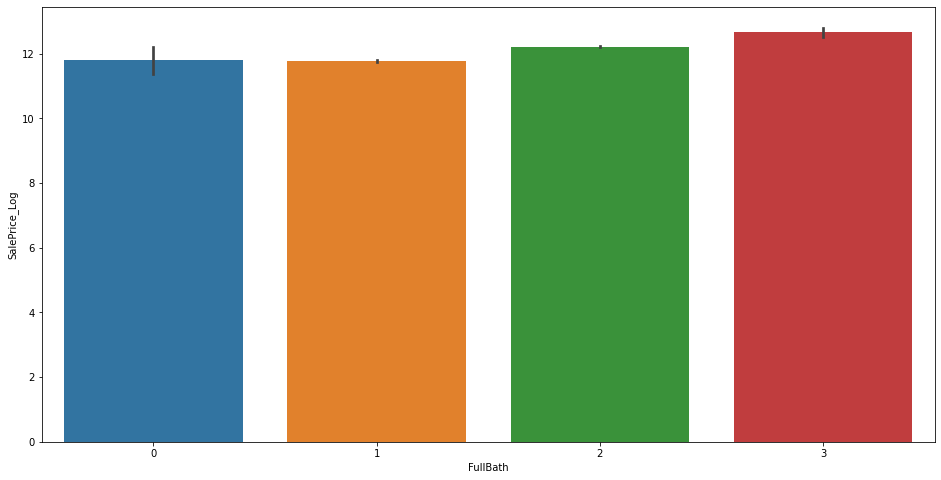

In [27]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice_Log',data=df_train)
plt.show()

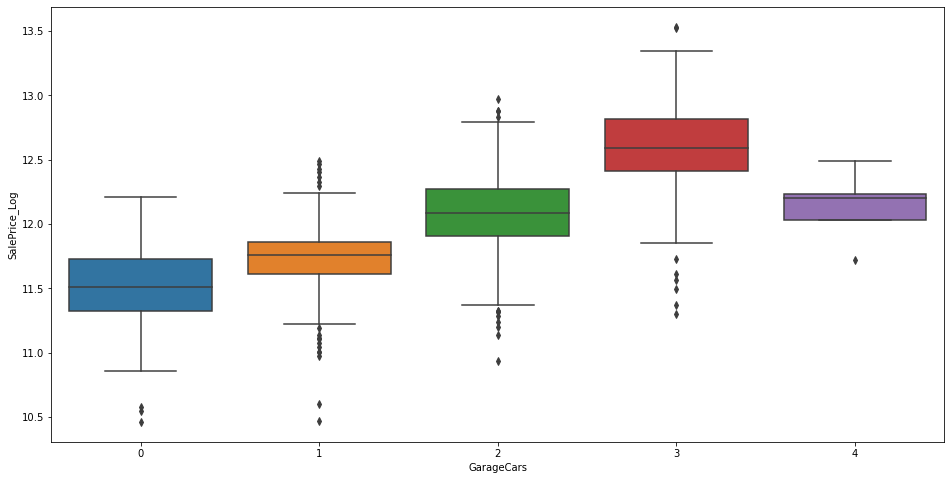

In [28]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice_Log',data=df_train)
plt.show()

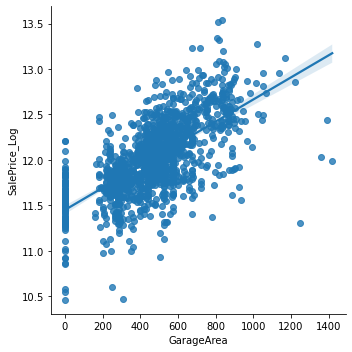

In [29]:
sns.lmplot(x='GarageArea',y='SalePrice_Log',data=df_train)

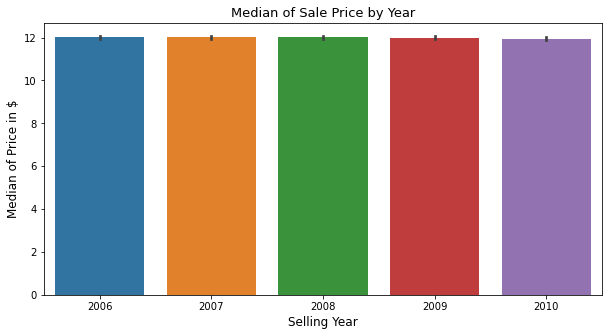

In [30]:
plt.figure(figsize = (10,5))
sns.barplot(x='YrSold', y="SalePrice_Log", data = df_train, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

## Numerical and Categorical features

In [31]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [32]:
print(df_train[numerical_feats].columns)
print("*"*100)
print(df_train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_Log'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Founda

In [33]:
df_train[numerical_feats].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice_Log  
0      12.247694  
1      12.109011  
2      12.317167  
3      11.849398  
4      12.429216

In [34]:
df_train[categorical_feats].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [35]:
numerical_feats = df_test.dtypes[df_test.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_test.dtypes[df_test.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  43


In [36]:
print(df_test[numerical_feats].columns)
print("*"*100)
print(df_test[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Bs

In [37]:
df_test[numerical_feats].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       1961          1961         0.0       468.0       144.0      270.0   
1       1958          1958       108.0       923.0         0.0      406.0   
2       1997          1998         0.0       791.0         0.0      137.0   
3       1998          1998        20.0       602.0         0.0      324.0   
4       1992          1992         0.0       263.0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        882.0       896         0             0        896           0.0   
1       1329.0      1329         0             0       1329           0.0   
2        928.0       928       701             0       1629           0.0   
3        926.0       926       678             0       1604           0.0   
4       1280.0      1280         0             0       1280           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0         1         0             2             1             5   
1           0.0         1         1             3             1             6   
2           0.0         2         1             3             1             6   
3           0.0         2         1             3             1             7   
4           0.0         2         0             2             1             5   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       1961.0         1.0       730.0         140            0   
1           0       1958.0         1.0       312.0         393           36   
2           1       1997.0         2.0       482.0         212           34   
3           1       1998.0         2.0       470.0         360           36   
4           0       1992.0         2.0       506.0           0           82   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0          120         0        0       6    2010  
1              0          0            0         0    12500       6    2010  
2              0          0            0         0        0       3    2010  
3              0          0            0         0        0       6    2010  
4              0          0          144         0        0       1    2010

In [38]:
df_test[categorical_feats].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0        NAmes      Feedr       Norm     1Fam     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
2      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Gilbert       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      StoneBr       Norm       Norm   TwnhsE     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd       None        TA        TA     CBlock       TA   
1     Wd Sdng     Wd Sdng    BrkFace        TA        TA     CBlock       TA   
2     VinylSd     VinylSd       None        TA        TA      PConc       Gd   
3     VinylSd     VinylSd    BrkFace        TA        TA      PConc       TA   
4     HdBoard     HdBoard       None        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          Rec          LwQ    GasA        TA   
1       TA           No          ALQ          Unf    GasA        TA   
2       TA           No          GLQ          Unf    GasA        Gd   
3       TA           No          GLQ          Unf    GasA        Ex   
4       TA           No          ALQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          TA        Typ         NaN     Attchd   
1          Y      SBrkr          Gd        Typ         NaN     Attchd   
2          Y      SBrkr          TA        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Attchd   
4          Y      SBrkr          Gd        Typ         NaN     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
0          Unf         TA         TA          Y    NaN  MnPrv         NaN   
1          Unf         TA         TA          Y    NaN    NaN        Gar2   
2          Fin         TA         TA          Y    NaN  MnPrv         NaN   
3          Fin         TA         TA          Y    NaN    NaN         NaN   
4          RFn         TA         TA          Y    NaN    NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD        Normal  
4       WD        Normal

## handling  missingh value according to description

### for train data

In [39]:
df_train[categorical_feats].isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [40]:
df_train[numerical_feats].isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
WoodDeckSF         0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
EnclosedPorch      0
OpenPorchSF        0
HalfBath           0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
BedroomAbvGr       0
BsmtHalfBath       0
FullBath           0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
MSSubClass         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
YrSold             0
dtype: int64

### for test data

In [41]:
df_test[categorical_feats].isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
GarageCond         78
GarageQual         78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType2       42
BsmtFinType1       42
MasVnrType         16
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
KitchenQual         1
SaleType            1
Exterior1st         1
LotShape            0
LandContour         0
PavedDrive          0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
Electrical          0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Street              0
Foundation          0
ExterCond           0
ExterQual           0
SaleCondition       0
dtype: int64

In [42]:
df_test[numerical_feats].isnull().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

### Filling Categorical NaN (That we know how to fill due to the description file )

In [43]:
for col in ('PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    df_train[col] = df_train[col].fillna("None")
    df_test[col] = df_test[col].fillna("None")

In [44]:
df_test['Functional'] = df_test['Functional'].fillna('Typ')
df_test['KitchenQual'] = df_test['KitchenQual'].fillna("TA")
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])

df_train['Electrical'] = df_train['Electrical'].fillna("SBrkr")

### Filling Numerical NaN

In [45]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [46]:
df_train.isnull().sum().sum()

0

In [47]:
df_test.isnull().sum().sum()

0

## FEATURE ENGINEERING

In [48]:
# Removing the useless features
useless = ['GarageYrBlt','YearRemodAdd'] 
df_train = df_train.drop(useless, axis = 1)
df_test = df_test.drop(useless, axis = 1)

### creating some new features combining the ones that we already have. These could help us to increase the performance of the model!

In [49]:
df_test["SqFtPerRoom"] = df_test["GrLivArea"] / (df_test["TotRmsAbvGrd"] + df_test["FullBath"] + df_test["HalfBath"] +df_test["KitchenAbvGr"])
df_test['Total_Home_Quality'] = df_test['OverallQual'] + df_test['OverallCond']
df_test['Total_Bathrooms'] = (df_test['FullBath'] + (0.5 * df_test['HalfBath']) +df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath']))
df_test["HighQualSF"] = df_test["1stFlrSF"] + df_test["2ndFlrSF"]
df_test["HBuilt_y_ago"]=(2023-df_test['YearBuilt'])
df_test["HSold_y_ago"]=(2023-df_test["YrSold"])

In [50]:
df_train["SqFtPerRoom"] = df_train["GrLivArea"] / (df_train["TotRmsAbvGrd"] + df_train["FullBath"] + df_train["HalfBath"] +df_train["KitchenAbvGr"])
df_train['Total_Home_Quality'] = df_train['OverallQual'] + df_train['OverallCond']
df_train['Total_Bathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_train["HighQualSF"] = df_train["1stFlrSF"] + df_train["2ndFlrSF"]
df_train["HBuilt_y_ago"]=(2023-df_train['YearBuilt'])
df_train["HSold_y_ago"]=(2023-df_train["YrSold"])

In [51]:
# dropping columns

df_train = df_train.drop(['Id','OverallQual','OverallCond','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath',"1stFlrSF","2ndFlrSF",'YearBuilt',"YrSold"], axis = 1)
df_test = df_test.drop(['Id','OverallQual','OverallCond','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath',"1stFlrSF","2ndFlrSF",'YearBuilt',"YrSold"], axis = 1)

## Convert categorical columns to numerical

In [52]:
#List of categorical features and their unique values
for cat_train in list(categorical_feats) :
    print(df_train[cat_train].value_counts())
    print('#'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1454
Grvl       6
Name: Street, dtype: int64
##################################################
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
###########################

In [53]:
for cat_test in list(categorical_feats) :
    print(df_test[cat_test].value_counts())
    print('#'*50)

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
##################################################
Pave    1453
Grvl       6
Name: Street, dtype: int64
##################################################
None    1352
Grvl      70
Pave      37
Name: Alley, dtype: int64
##################################################
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64
##################################################
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64
##################################################
AllPub    1459
Name: Utilities, dtype: int64
##################################################
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
##################################################
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
##########################################

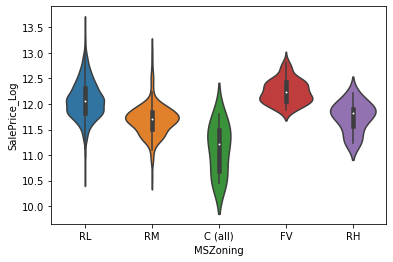

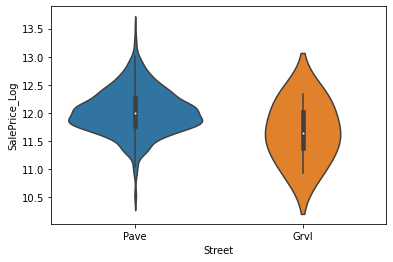

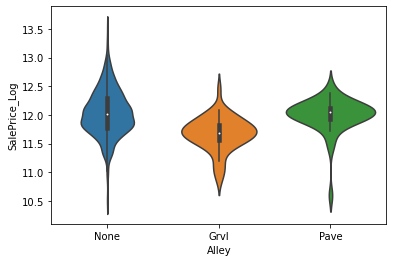

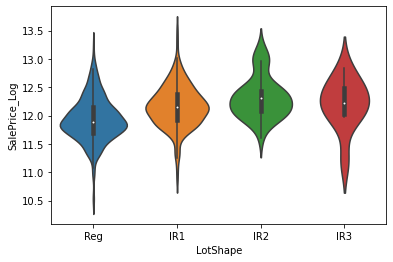

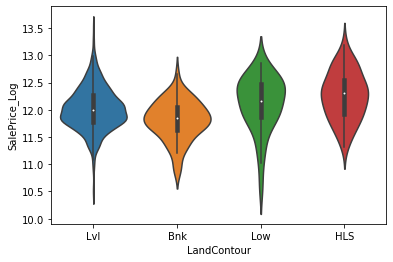

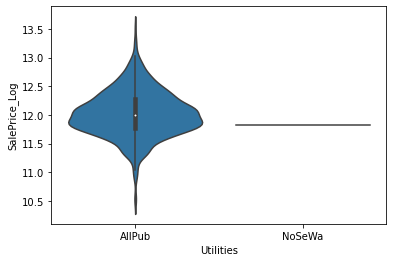

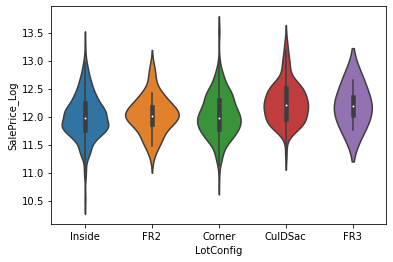

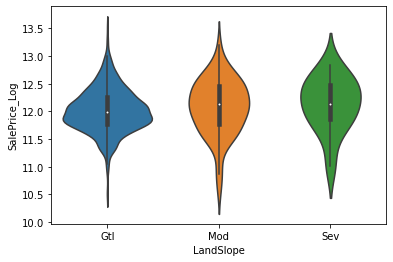

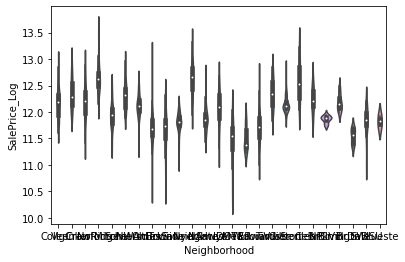

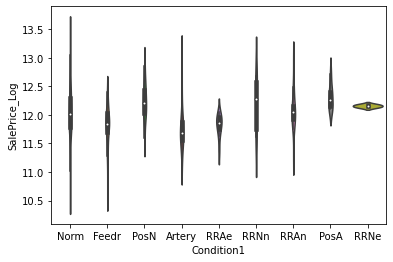

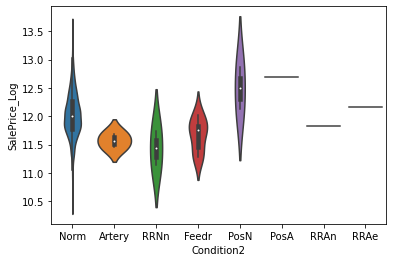

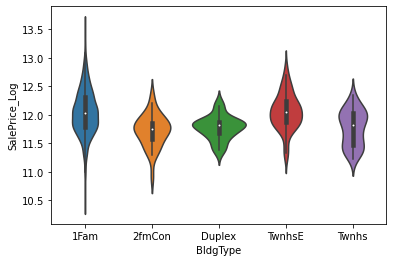

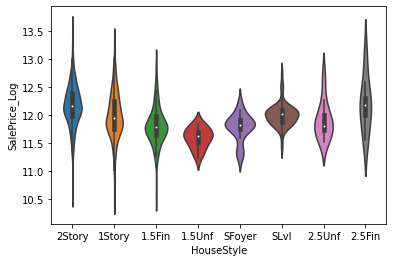

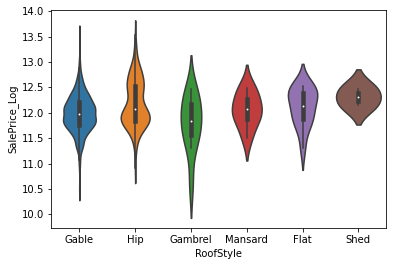

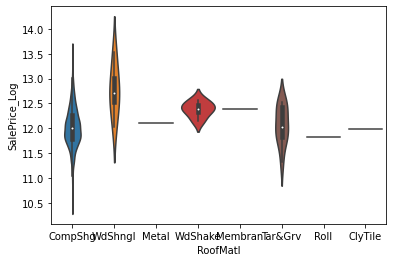

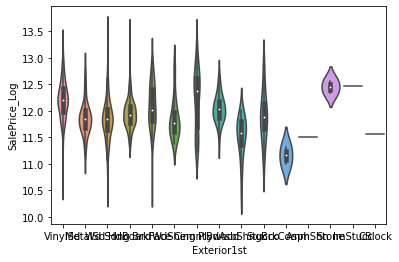

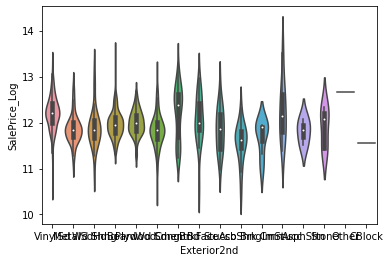

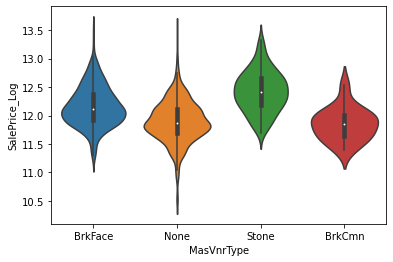

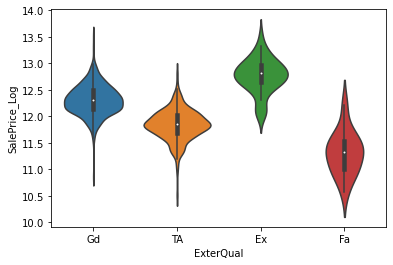

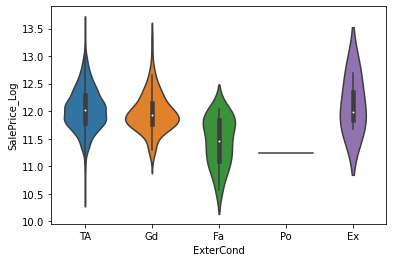

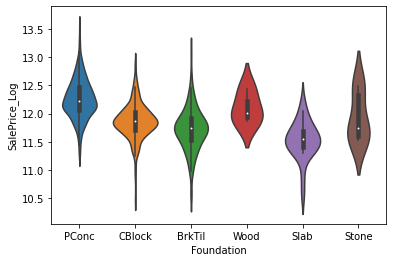

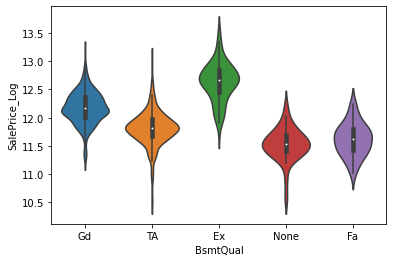

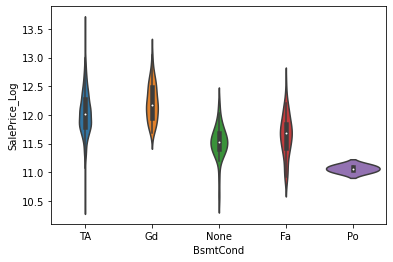

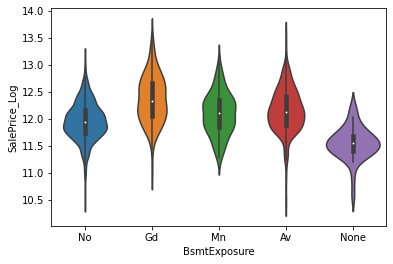

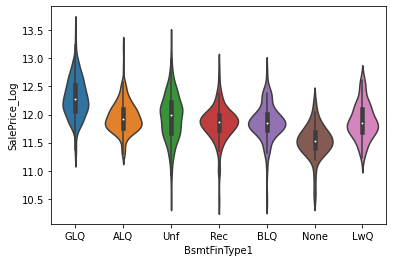

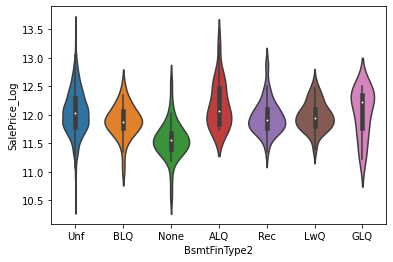

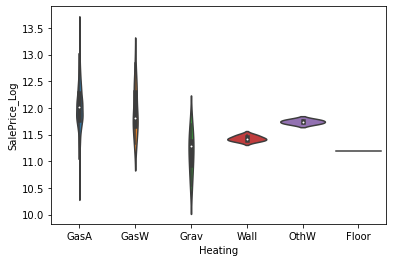

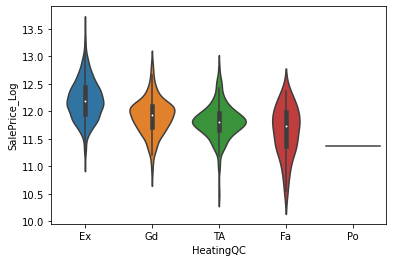

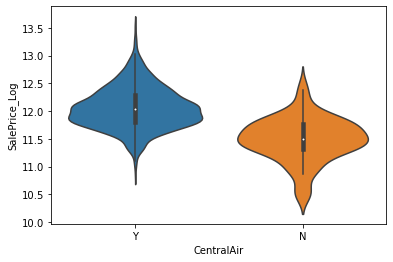

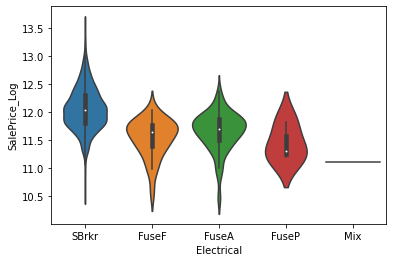

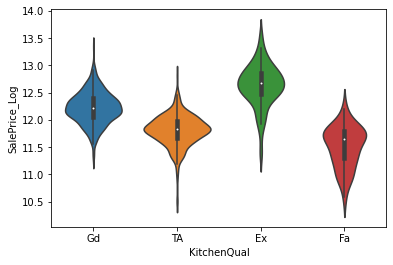

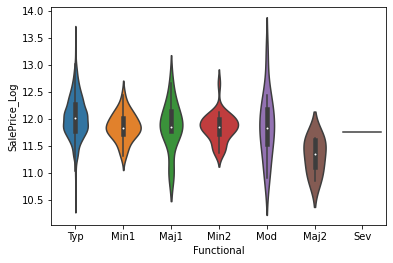

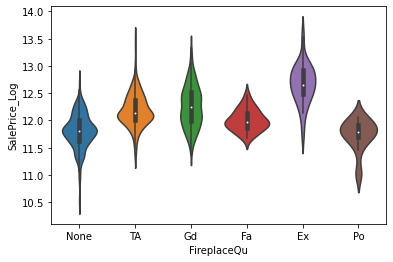

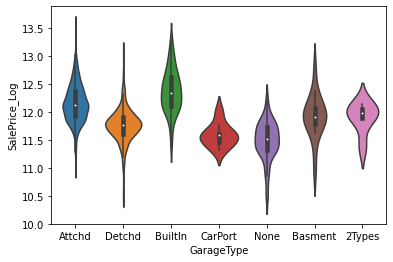

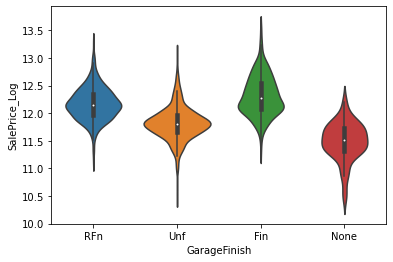

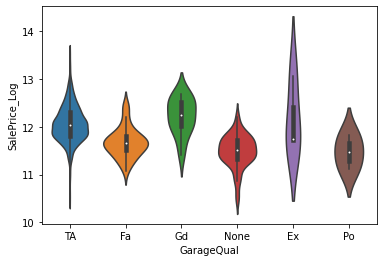

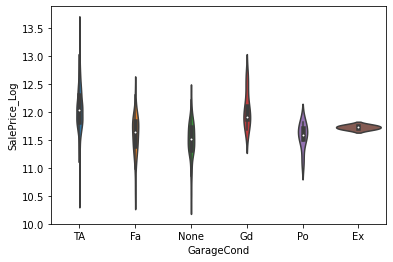

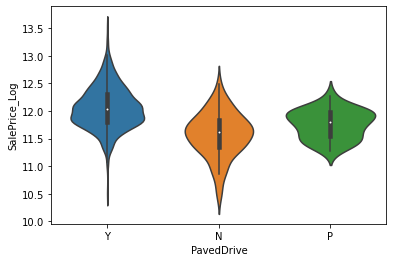

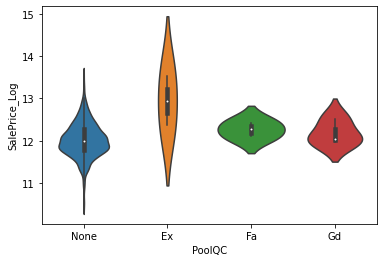

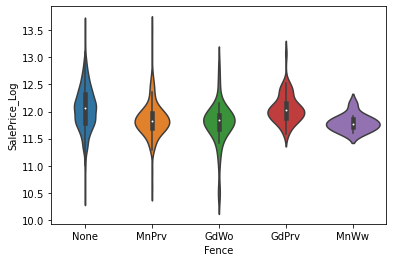

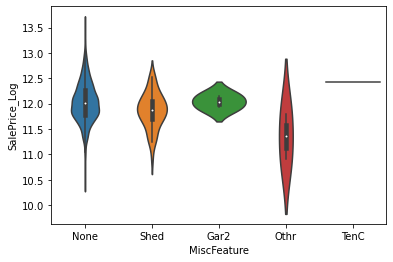

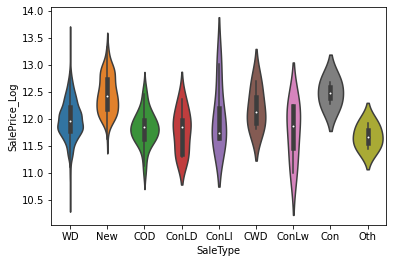

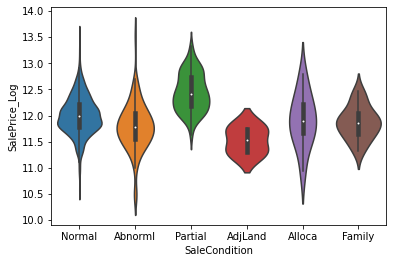

In [54]:
for catg in list(categorical_feats) :
    #sns.catplot(x=catg, y=target, data=df_train, kind='boxen')
    sns.violinplot(x=catg, y="SalePrice_Log", data=df_train)
    plt.show()

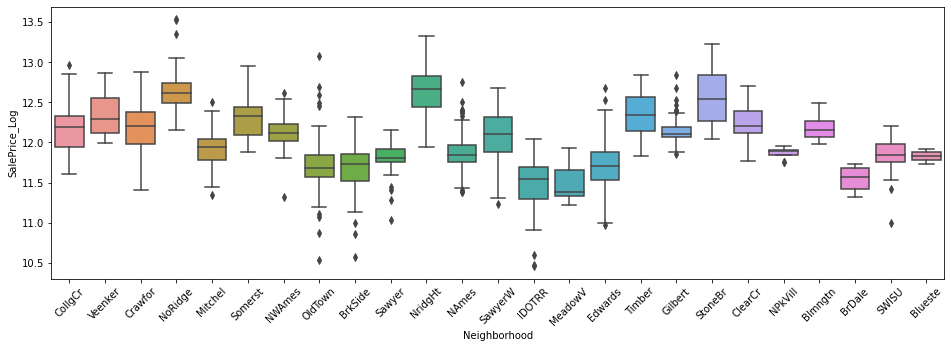

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.boxplot(x='Neighborhood', y="SalePrice_Log", data=df_train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [56]:
train_test=pd.concat([df_train, df_test], ignore_index=True)

In [57]:
train_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   
1       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd   
2       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   
3       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng   
4       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ       706.0          Unf         0.0      150.0   
1           Gd          ALQ       978.0          Unf         0.0      284.0   
2           Mn          GLQ       486.0          Unf         0.0      434.0   
3           No          ALQ       216.0          Unf         0.0      540.0   
4           Av          GLQ       655.0          Unf         0.0      490.0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  LowQualFinSF  \
0        856.0    GasA        Ex          Y      SBrkr             0   
1       1262.0    GasA        Ex          Y      SBrkr             0   
2        920.0    GasA        Ex          Y      SBrkr             0   
3        756.0    GasA        Gd          Y      SBrkr             0   
4       1145.0    GasA        Ex          Y      SBrkr             0   

   GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0       1710             3             1          Gd             8        Typ   
1       1262             3             1          TA             6        Typ   
2       1786             3             1          Gd             6        Typ   
3       1717             3             1          Gd             7        Typ   
4       2198             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           0        None     Attchd          RFn         2.0       548.0   
1           1          TA     Attchd          RFn         2.0       460.0   
2           1          TA     Attchd          RFn         2.0       608.0   
3           1          Gd     Detchd          Unf         3.0       642.0   
4           1          TA     Attchd          RFn         3.0       836.0   

  GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         TA         TA          Y           0           61              0   
1         TA         TA          Y         298            0              0   
2         TA         TA          Y           0           42              0   
3         TA         TA          Y           0 

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_test_1 = train_test.copy(deep = True)
text_df_features = [i for i in list(train_test.columns) if i not in list(train_test.describe().columns)]

print('Label Encoder Transformation')
for i in text_df_features :
    train_test_1[i] = le.fit_transform(train_test_1[i])
    print(i,' : ',train_test_1[i].unique(),' = ',le.inverse_transform(train_test_1[i].unique()))

Label Encoder Transformation
MSZoning  :  [3 4 0 1 2]  =  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  [1 0]  =  ['Pave' 'Grvl']
Alley  :  [1 0 2]  =  ['None' 'Grvl' 'Pave']
LotShape  :  [3 0 1 2]  =  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  [3 0 2 1]  =  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  [0 1]  =  ['AllPub' 'NoSeWa']
LotConfig  :  [4 2 0 1 3]  =  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  [0 1 2]  =  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  [ 5 24  6 15 11 21 14 17  3 19 16 12 20  9 10  7 23  8 22  4 13  0  2 18
  1]  =  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  [2 1 4 0 5 8 6 3 7]  =  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  [2 0 7 1 4 3 6 5]  =  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgTyp

In [59]:
train_test_1.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3         65.0     8450       1      1         3   
1          20         3         80.0     9600       1      1         3   
2          60         3         68.0    11250       1      1         0   
3          70         3         60.0     9550       1      1         0   
4          60         3         84.0    14260       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  \
0           2         0           5          1         1           12   
1           2         0           2          1         1            8   
2           2         0           5          1         1           12   
3           2         0           5          1         1           13   
4           2         0           5          1         1           12   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0           13           1       196.0          2          4           2   
1            8           2         0.0          3          4           1   
2           13           1       162.0          2          4           2   
3           15           2         0.0          3          4           0   
4           13           1       350.0          2          4           2   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         2         4             3             2       706.0             6   
1         2         4             1             0       978.0             6   
2         2         4             2             2       486.0             6   
3         4         1             3             0       216.0             6   
4         2         4             0             2       655.0             6   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0         0.0      150.0        856.0        1          0           1   
1         0.0      284.0       1262.0        1          0           1   
2         0.0      434.0        920.0        1          0           1   
3         0.0      540.0        756.0        1          2           1   
4         0.0      490.0       1145.0        1          0           1   

   Electrical  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  \
0           4             0       1710             3             1   
1           4             0       1262             3             1   
2           4             0       1786             3             1   
3           4             0       1717             3             1   
4           4             0       2198             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0            2             8           6           0            3           1   
1            3             6           6           1            5           1   
2            2             6           6           1            5           1   
3            2             7           6           1            2           5   
4            2             9           6           1            5           1   

   GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  \
0             2         2.0       548.0           5           5           2   
1             2         2.0       460.0           5           5           2   
2             2         2.0       608.0           5           5           2   
3             3         3.0       642.0           5          

In [60]:
train_final=train_test_1.loc[0:1459 , :]

In [61]:
train_final.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3         65.0     8450       1      1         3   
1          20         3         80.0     9600       1      1         3   
2          60         3         68.0    11250       1      1         0   
3          70         3         60.0     9550       1      1         0   
4          60         3         84.0    14260       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  \
0           2         0           5          1         1           12   
1           2         0           2          1         1            8   
2           2         0           5          1         1           12   
3           2         0           5          1         1           13   
4           2         0           5          1         1           12   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0           13           1       196.0          2          4           2   
1            8           2         0.0          3          4           1   
2           13           1       162.0          2          4           2   
3           15           2         0.0          3          4           0   
4           13           1       350.0          2          4           2   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         2         4             3             2       706.0             6   
1         2         4             1             0       978.0             6   
2         2         4             2             2       486.0             6   
3         4         1             3             0       216.0             6   
4         2         4             0             2       655.0             6   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0         0.0      150.0        856.0        1          0           1   
1         0.0      284.0       1262.0        1          0           1   
2         0.0      434.0        920.0        1          0           1   
3         0.0      540.0        756.0        1          2           1   
4         0.0      490.0       1145.0        1          0           1   

   Electrical  LowQualFinSF  GrLivArea  BedroomAbvGr  KitchenAbvGr  \
0           4             0       1710             3             1   
1           4             0       1262             3             1   
2           4             0       1786             3             1   
3           4             0       1717             3             1   
4           4             0       2198             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0            2             8           6           0            3           1   
1            3             6           6           1            5           1   
2            2             6           6           1            5           1   
3            2             7           6           1            2           5   
4            2             9           6           1            5           1   

   GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  \
0             2         2.0       548.0           5           5           2   
1             2         2.0       460.0           5           5           2   
2             2         2.0       608.0           5           5           2   
3             3         3.0       642.0           5          

In [62]:
test_final=train_test_1.loc[1461: , : ]

In [63]:
test_final.drop(['SalePrice_Log'],axis=1,inplace=True)

In [64]:
test_final.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
1461          20         3         81.0    14267       1      1         0   
1462          60         3         74.0    13830       1      1         0   
1463          60         3         78.0     9978       1      1         0   
1464         120         3         43.0     5005       1      1         0   
1465          60         3         75.0    10000       1      1         0   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
1461            3          0          0          0            12           2   
1462            3          0          4          0             8           2   
1463            3          0          4          0             8           2   
1464            1          0          4          0            22           2   
1465            3          0          0          0             8           2   

      Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  \
1461           2         0           2          3         1           13   
1462           2         0           5          1         1           12   
1463           2         0           5          1         1           12   
1464           2         4           2          1         1            6   
1465           2         0           5          1         1            6   

      Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
1461           14           1       108.0          3          4           1   
1462           13           2         0.0          3          4           2   
1463           13           1        20.0          3          4           2   
1464            6           2         0.0          2          4           2   
1465            6           2         0.0          3          4           2   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
1461         4         4             3             0       923.0   
1462         2         4             3             2       791.0   
1463         4         4             3             2       602.0   
1464         2         4             3             0       263.0   
1465         2         4             3             6         0.0   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
1461             6         0.0      406.0       1329.0        1          4   
1462             6         0.0      137.0        928.0        1          2   
1463             6         0.0      324.0        926.0        1          0   
1464             6         0.0     1017.0       1280.0        1          0   
1465             6         0.0      763.0        763.0        1          2   

      CentralAir  Electrical  LowQualFinSF  GrLivArea  BedroomAbvGr  \
1461           1           4             0       1329             3   
1462           1           4             0       1629             3   
1463           1           4             0       1604             3   
1464           1           4             0       1280             2   
1465           1           4             0       1655             3   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
1461             1            2             6           6           0   
1462             1            3             6           6           1   
1463             1            2             7           6           1   
1464             1            2             5           6           0   
1465             1            3             7           6           1   

      FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  \
1461            3           1             3         1.0       312.0   
1462            5           1             0         2.0       482.0   
1463            2           1             0         2.0       470.0   
1464            3           1             2         2.0       506.0   
1465            5           1  

## creating base model

In [65]:
X=train_final.drop(["SalePrice_Log"],axis=1)
X

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3    65.000000     8450       1      1         3   
1             20         3    80.000000     9600       1      1         3   
2             60         3    68.000000    11250       1      1         0   
3             70         3    60.000000     9550       1      1         0   
4             60         3    84.000000    14260       1      1         0   
5             50         3    85.000000    14115       1      1         0   
6             20         3    75.000000    10084       1      1         3   
7             60         3    70.049958    10382       1      1         0   
8             50         4    51.000000     6120       1      1         3   
9            190         3    50.000000     7420       1      1         3   
10            20         3    70.000000    11200       1      1         3   
11            60         3    85.000000    11924       1      1         0   
12            20         3    70.049958    12968       1      1         1   
13            20         3    91.000000    10652       1      1         0   
14            20         3    70.049958    10920       1      1         0   
15            45         4    51.000000     6120       1      1         3   
16            20         3    70.049958    11241       1      1         0   
17            90         3    72.000000    10791       1      1         3   
18            20         3    66.000000    13695       1      1         3   
19            20         3    70.000000     7560       1      1         3   
20            60         3   101.000000    14215       1      1         0   
21            45         4    57.000000     7449       1      0         3   
22            20         3    75.000000     9742       1      1         3   
23           120         4    44.000000     4224       1      1         3   
24            20         3    70.049958     8246       1      1         0   
25            20         3   110.000000    14230       1      1         3   
26            20         3    60.000000     7200       1      1         3   
27            20         3    98.000000    11478       1      1         3   
28            20         3    47.000000    16321       1      1         0   
29            30         4    60.000000     6324       1      1         0   
30            70         0    50.000000     8500       1      2         3   
31            20         3    70.049958     8544       1      1         0   
32            20         3    85.000000    11049       1      1         3   
33            20         3    70.000000    10552       1      1         0   
34           120         3    60.000000     7313       1      1         3   
35            60         3   108.000000    13418       1      1         3   
36            20         3   112.000000    10859       1      1         3   
37            20         3    74.000000     8532       1      1         3   
38            20         3    68.000000     7922       1      1         3   
39            90         3    65.000000     6040       1      1         3   
40            20         3    84.000000     8658       1      1         3   
41            20         3   115.000000    16905       1      1         3   
42            85         3    70.049958     9180       1      1         0   
43            20         3    70.049958     9200       1      1         0   
44            20         3    70.000000     7945       1      1         3   
45           120         3    61.000000     7658       1      1         3   
46            50         3    48.000000    12822       1      1         0   
47            20         1    84.000000    11096       1      1         3   
48           190         4    33.000000     4456       1      1         3   
49            20         3    66.000000     7742       1      1         3   
50            60         3    70.049958    13869       1      1         1   
51

In [66]:
y=train_final.SalePrice_Log
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [67]:
# Data Scaling :
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X=sc.fit_transform(X)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=4)

## Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred=lr.predict(X_test)

In [71]:
from sklearn.metrics import r2_score

In [72]:
score=r2_score(y_pred,y_test)*100

In [73]:
score

85.78878725678787

<AxesSubplot:xlabel='SalePrice_Log', ylabel='Density'>

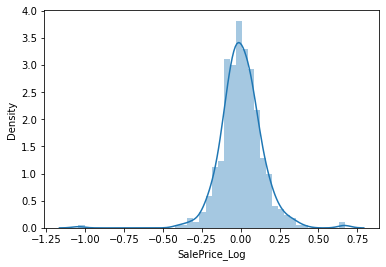

In [74]:
sns.distplot(y_pred-y_test)